This notebook compares all models and graphs them to see which has the lowest RSME

# Import Packages and Data

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
simple_mean = pd.read_csv('model_one.csv')
simple_mean = simple_mean.dropna()
simple_mean = simple_mean[(simple_mean['Season'].between(2012, 2024))]

In [9]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean = pd.read_csv('model_two.csv')
weighted_mean = weighted_mean.dropna()
weighted_mean = weighted_mean[(weighted_mean['Season'].between(2012, 2024))]

In [10]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean_with_pa = pd.read_csv('model_three.csv')
weighted_mean_with_pa = weighted_mean_with_pa.dropna()
weighted_mean_with_pa = weighted_mean_with_pa[(weighted_mean_with_pa['Season'].between(2012, 2024))]

In [11]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean_with_pa_regress_to_mean = pd.read_csv('model_four.csv')
weighted_mean_with_pa_regress_to_mean = weighted_mean_with_pa_regress_to_mean.dropna()
weighted_mean_with_pa_regress_to_mean = weighted_mean_with_pa_regress_to_mean[(weighted_mean_with_pa_regress_to_mean['Season'].between(2012, 2024))]

In [12]:
# Import model1 projections drop rows with empty data (rookies, second, third, and 2025 seasons)
lasso = pd.read_csv('model_five.csv')

In [14]:
steamer = pd.read_csv('steamer.csv')
steamer = steamer.drop(columns=['Projected_G', 'G'])

In [15]:
steamer_top15 = (
    steamer.groupby(['Season', 'Team'], group_keys=False)
    .apply(lambda x: x.nlargest(15, 'Projected_PA'))
)


C:\Users\thoma\AppData\Local\Temp\ipykernel_22976\968654290.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(15, 'Projected_PA'))


In [16]:
mean_filtered = simple_mean.merge(steamer_top15[['IDfg', 'Season']], on=['IDfg', 'Season'], how='inner')


In [18]:
steamer_top15.shape

(5847, 42)

In [17]:
mean_filtered.shape

(5839, 57)

In [19]:
missing_from_model5 = steamer_top15.merge(
    mean_filtered[['IDfg', 'Season']], 
    on=['IDfg', 'Season'], 
    how='left', 
    indicator=True
).query('_merge == "left_only"').drop(columns=['_merge'])


In [20]:
missing_from_model5

,IDfg,Season,Name,Team,Projected_H,Projected_2B,Projected_3B,Projected_HR,Projected_R,Projected_RBI,...,AB,PA,AVG,BB%,OBP,SLG,OPS,ISO,wRAA,wRC+
504,12984,2013,Jackie Bradley Jr.,BOS,41.0,10.0,1.0,3.0,20.0,17.0,...,95,107,0.189,0.093,0.280,0.337,0.617,0.147,-2.9,68
2666,11761,2017,Drew Robinson,TEX,9.0,2.0,0.0,1.0,5.0,5.0,...,107,121,0.224,0.116,0.314,0.439,0.753,0.215,0.3,91
2742,15481,2018,Engelb Vielma,BAL,10.0,1.0,0.0,0.0,4.0,3.0,...,7,8,0.143,0.125,0.250,0.143,0.393,0.000,-0.8,17
3177,17276,2019,Alex Jackson,ATL,2.0,1.0,0.0,0.0,1.0,1.0,...,13,15,0.000,0.067,0.133,0.000,0.133,0.000,-3.5,-83
3922,18577,2020,Ke'Bryan Hayes,PIT,19.0,4.0,0.0,2.0,8.0,8.0,...,85,95,0.376,0.095,0.442,0.682,1.124,0.306,11.6,194
5096,23800,2023,Parker Meadows,DET,24.0,5.0,1.0,3.0,12.0,11.0,...,125,145,0.232,0.117,0.331,0.368,0.699,0.136,-1.2,95
5737,31363,2024,Graham Pauley,SDP,60.0,13.0,1.0,9.0,30.0,31.0,...,32,32,0.125,0.000,0.125,0.313,0.438,0.188,-3.3,17
5845,25979,2024,Nasim Nuñez,WSN,33.0,6.0,1.0,1.0,17.0,13.0,...,61,78,0.246,0.154,0.370,0.262,0.632,0.016,-0.7,92


In [40]:
missing_from_model5.to_csv('missing.csv')

PermissionError: [Errno 13] Permission denied: 'missing.csv'

In [ ]:
zips = pd.read_csv('zips.csv')
zips = zips.dropna()
zips = zips[(zips['Season'].between(2012, 2024)) & (zips['Projected_PA'] >= 400)]

In [ ]:
#Formula to caluculate RSME
def calculate_rsme(dataframe, value):
    dataframe['Error'] = dataframe[value] - dataframe[f"Projected_{value}"]
    dataframe['Squared_Error'] = dataframe['Error'] ** 2
    overall_rsme = np.sqrt(dataframe['Squared_Error'].mean())
    return overall_rsme

In [ ]:
non_pa_list = ['AB', 'PA', 'AVG','OBP', 'SLG', 'OPS', 'wRC+']
pa_list = ['H', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SB', 'WAR']
filtered_list = pa_list + non_pa_list

In [ ]:
simple_mean1 = {}
for col in filtered_list:
    simple_mean1[col] = calculate_rsme(simple_mean, col)

In [ ]:
weighted_mean2 = {}
for col in filtered_list:
    weighted_mean2[col] = calculate_rsme(weighted_mean, col)

In [ ]:
weighted_mean_with_pa3 = {}
for col in filtered_list:
    weighted_mean_with_pa3[col] = calculate_rsme(weighted_mean_with_pa, col)

In [ ]:
weighted_mean_with_pa_regress_to_mean4 = {}
for col in filtered_list:
    weighted_mean_with_pa_regress_to_mean4[col] = calculate_rsme(weighted_mean_with_pa_regress_to_mean, col)

In [ ]:
lasso5 = {}
for col in filtered_list:
    lasso5[col] = calculate_rsme(lasso_filtered, col)

In [ ]:
steamer6 = {}
for col in filtered_list:
    steamer6[col] = calculate_rsme(steamer_top15, col)

In [ ]:
zips7 = {}
for col in filtered_list:
    zips7[col] = calculate_rsme(zips, col)

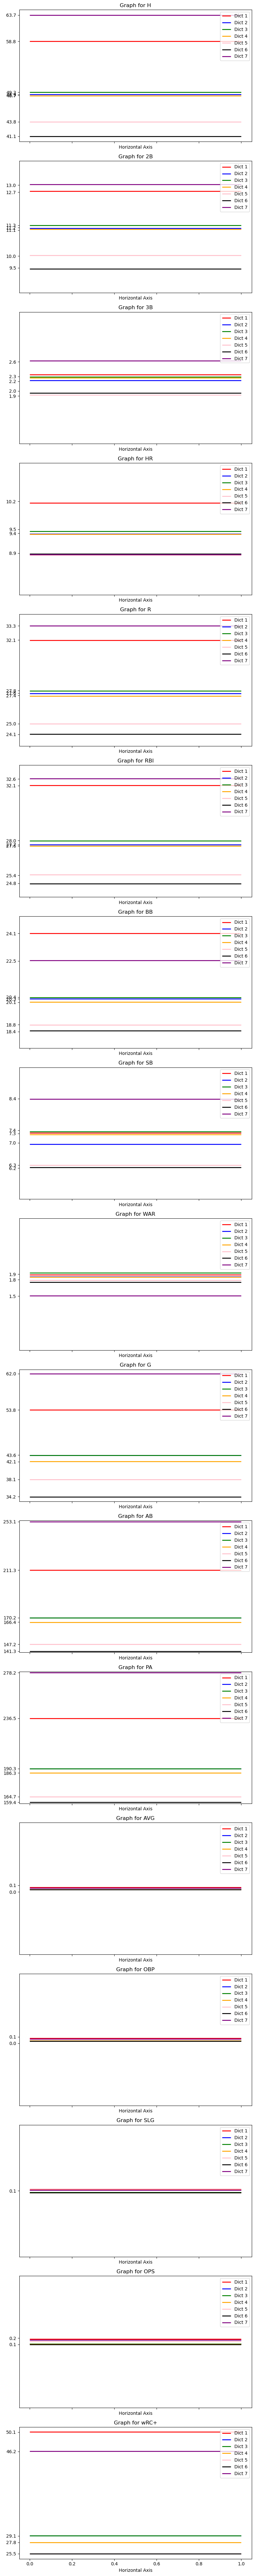

In [ ]:
# Combine dictionaries into a list for easier handling
dicts = [simple_mean1, weighted_mean2, weighted_mean_with_pa3, weighted_mean_with_pa_regress_to_mean4, lasso5, steamer6, zips7]
keys = list(simple_mean1.keys())

# Set up subplots: one per key
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(8, 80), sharex=True)

# Colors for the lines
colors = ['red', 'blue', 'green', 'orange', 'pink', 'black', 'purple']

# Plot data
for ax, key in zip(axes, keys):
    for i, d in enumerate(dicts):
        value = d[key]
        ax.hlines(y=value, xmin=0, xmax=1, colors=colors[i], linewidth=2, label=f'Dict {i+1}')
    ax.set_title(f"Graph for {key}")
    # Adjust y-axis ticks to fit float values
    y_min = min(d[key] for d in dicts) - 1  # Slight padding below the minimum
    y_max = max(d[key] for d in dicts) + 1  # Slight padding above the maximum
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(sorted(set([round(d[key], 1) for d in dicts])))  # Add rounded float ticks
    ax.set_xlabel("Horizontal Axis")
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


